# Insurance

In [895]:
# Comando mágico do jupyter
# Para plotar graficos no jupyter sem prescisar chamar plt.show()
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib as mpl
import numpy as np
import os

# Seed para geração de números aleatórios
np.random.seed(42)

# Configurações globais dos gráficos
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_frame = pd.read_csv("insurance.csv")

## Análise Exploratória de Dados

In [896]:
data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [897]:
data_frame.shape

(1338, 7)

In [898]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1338 registros, todos não nulos, temos três tipos diferentes de dados categóricos ["sex", "smoker", "region"]

In [899]:
set(data_frame["sex"])

{'female', 'male'}

In [900]:
set(data_frame["smoker"])

{'no', 'yes'}

In [901]:
set(data_frame["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

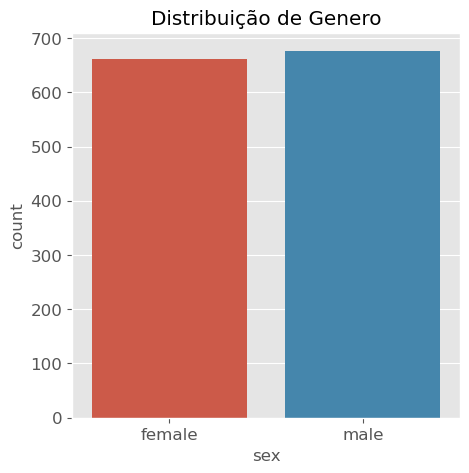

In [902]:
# Qual a relação entre homens e mulheres na base de dados?
import seaborn as sns
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=data_frame)
plt.title('Distribuição de Genero')
plt.show()

A base tem um pouco mais de homens que de mulheres

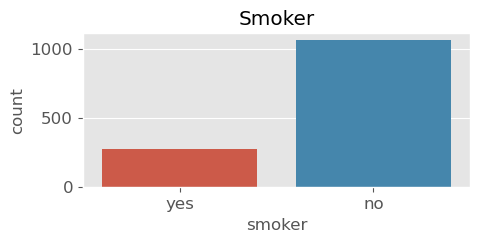

In [903]:
# Qual a relação entre fumantes e não fumantes na base de dados?
plt.figure(figsize=(5,2))
sns.countplot(x='smoker', data=data_frame)
plt.title('Smoker')
plt.show()

Temos bem mais não fumantes que fumantes

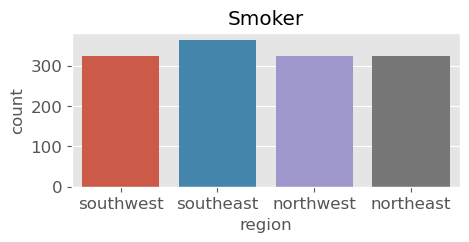

In [904]:
# Qual a relação entre fumantes e não fumantes na base de dados?
plt.figure(figsize=(5,2))
sns.countplot(x='region', data=data_frame)
plt.title('Smoker')
plt.show()

In [905]:
data_frame["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Temos um pouco mais de southeast que das outras regiões. Vamos checar a relação entre a variável charge e as categóricas

<Axes: xlabel='region', ylabel='charges'>

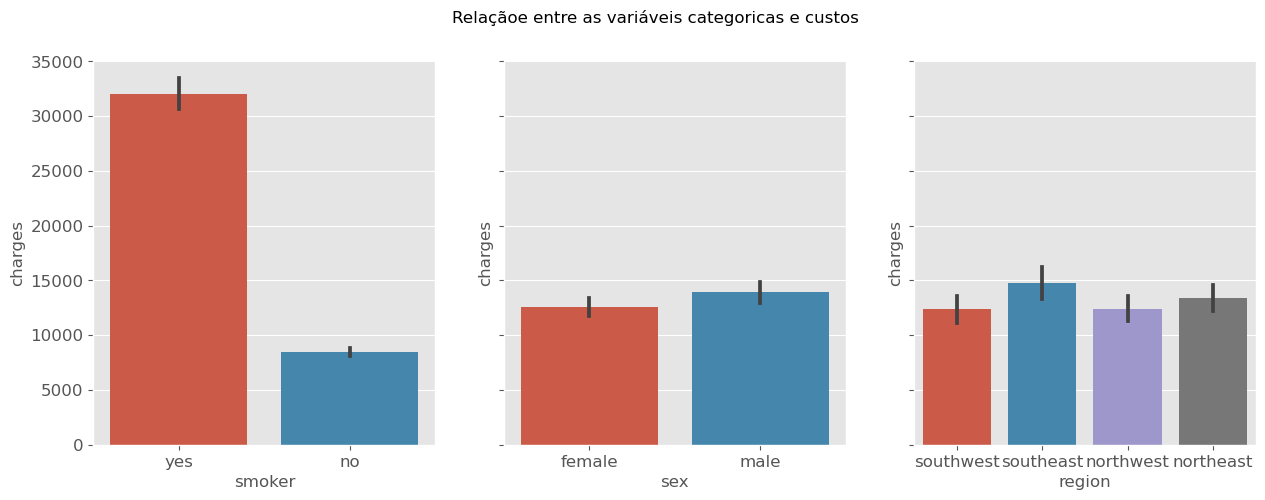

In [906]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Relaçãoe entre as variáveis categoricas e custos')
sns.barplot(x='smoker', y= 'charges', data=data_frame, ax=axes[0])
sns.barplot(x='sex', y= 'charges', data=data_frame, ax=axes[1])
sns.barplot(x='region', y= 'charges', data=data_frame, ax=axes[2])

<Axes: xlabel='sex', ylabel='charges'>

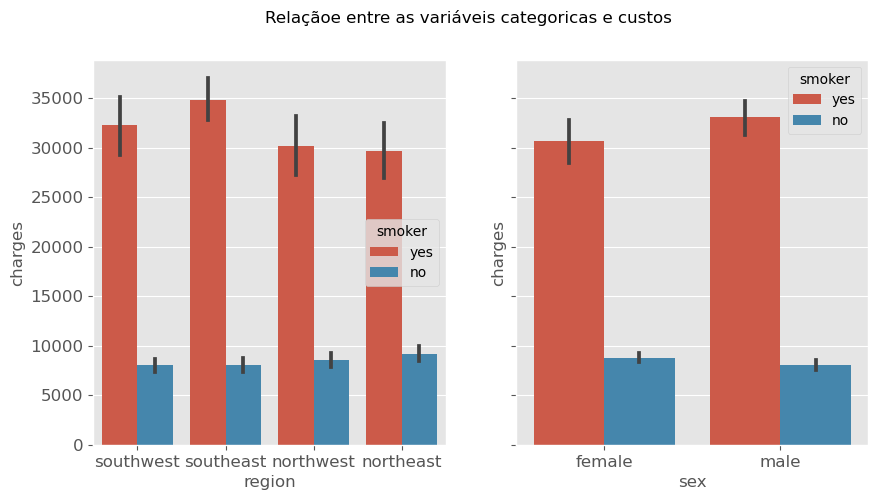

In [907]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
fig.suptitle('Relaçãoe entre as variáveis categoricas e custos')
sns.barplot(x='region', y= 'charges', hue='smoker', data=data_frame, ax=axes[0])
sns.barplot(x='sex', y= 'charges', hue='smoker', data=data_frame, ax=axes[1])


Analisando as variáveis categórias e custo podemos perceber que as pessoas que fumam tendem a ter valores maiores de seguro saúde. Região e sexo parecem ter um valor de custo mais distribuídos

In [908]:
# Descrição dos dados numéricos
data_frame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


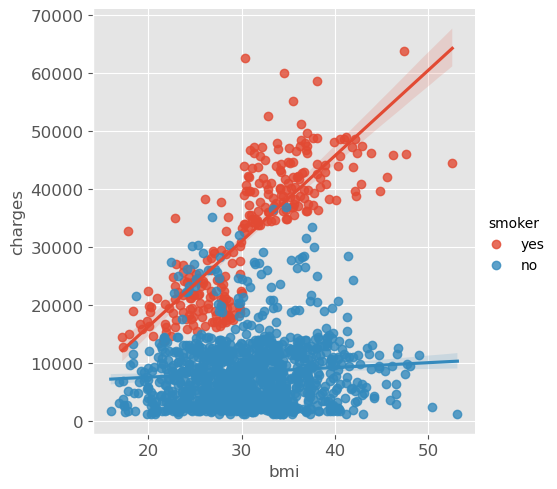

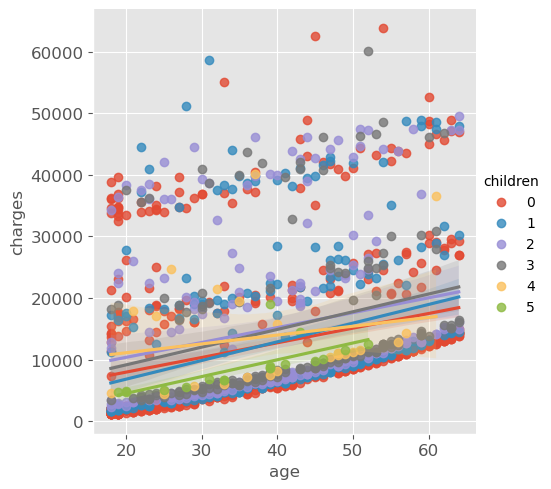

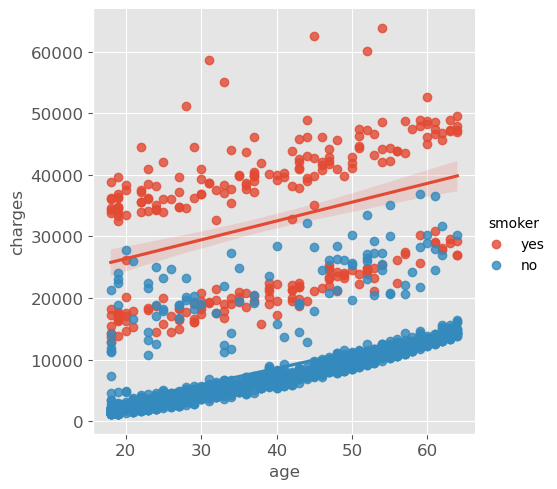

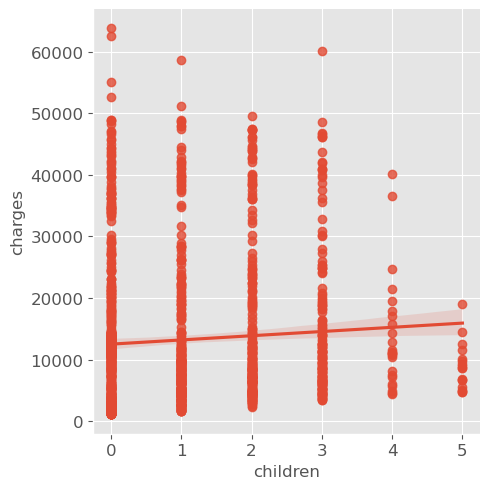

In [909]:
sns.lmplot(x='bmi', y='charges', data=data_frame, hue='smoker') 
sns.lmplot(x='age', y= 'charges', data=data_frame, hue='children')
sns.lmplot(x='age', y= 'charges', data=data_frame, hue='smoker')
sns.lmplot(x='children', y= 'charges', data=data_frame)

Analisando os dados numéricos podemos ver um relação entre o custo do seguro saúde com o bmi (indice de massa corporea) e se a pessoa fuma ou não. Podemos ver que Os custos são maiores entre fumantes com maior bmi. Já os não fumantes com com alto bmi tem um custo de seguro mais baixo.

Também podemos perceber que o fato da pessoa fumar também pressiona o custo com o aumento a idade

A relação entre tabagismo e a quantidade de filhos não aparenta aumentar custo, bem como o numero de filhos também não apresenta uma forte relação com o aumento de custo 

In [910]:
# Vamos utilizar a tecnica de label encoder para transformar as variáveis categóricas em valores numéricos e criar um histograma com a distribuição dos dados
from sklearn.preprocessing import LabelEncoder

df_exploratorio = data_frame.copy()

label_encoder = LabelEncoder()

df_exploratorio['sex'] = label_encoder.fit_transform(df_exploratorio['sex'])
df_exploratorio['smoker'] = label_encoder.fit_transform(df_exploratorio['smoker'])
df_exploratorio['region'] = label_encoder.fit_transform(df_exploratorio['region'])

df_exploratorio.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Vamos buscar agora as correlações

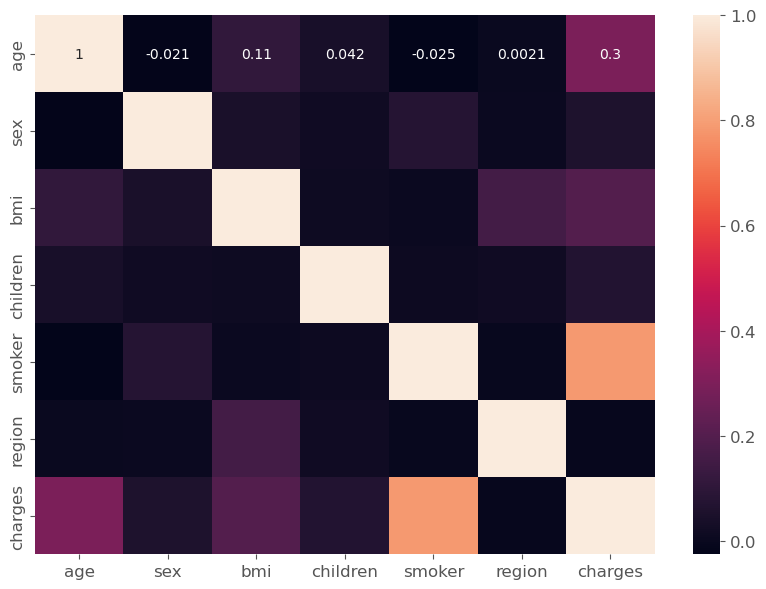

In [911]:
plt.figure(figsize=(10,7))
sns.heatmap(df_exploratorio.corr(), annot = True)
plt.show()

Quão mais claro, mais forte a relação entre uma variável com a nossa target ("charges"). 
 
Como esperado, tabagismo tem a mais forte de todas as relações seguido pela idade e o índice de massa corporal. 

Nesse caso podemos dizer que region, sex e children possuem os menores níveis de relacionamento

## Preparando as variáveis para treinamento

Os dados selecionado para participar do nosso lado X são smoker, bmi, age. O nosso lado Y será composto apenas da variável target.

In [912]:
# O nosso conjunto X será composto por todas as colunas exceto, chages, region, sex e children
X = data_frame.drop(['charges', 'sex', 'region'], axis=1)

# Y congtem charges que é a nossa target
Y = data_frame.charges

Uma vez que criamos os nossos data frames X e Y, vamos agora utilizar um histograma pra visualizar a distribuição dos nossos dados.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>, <Axes: >]], dtype=object)

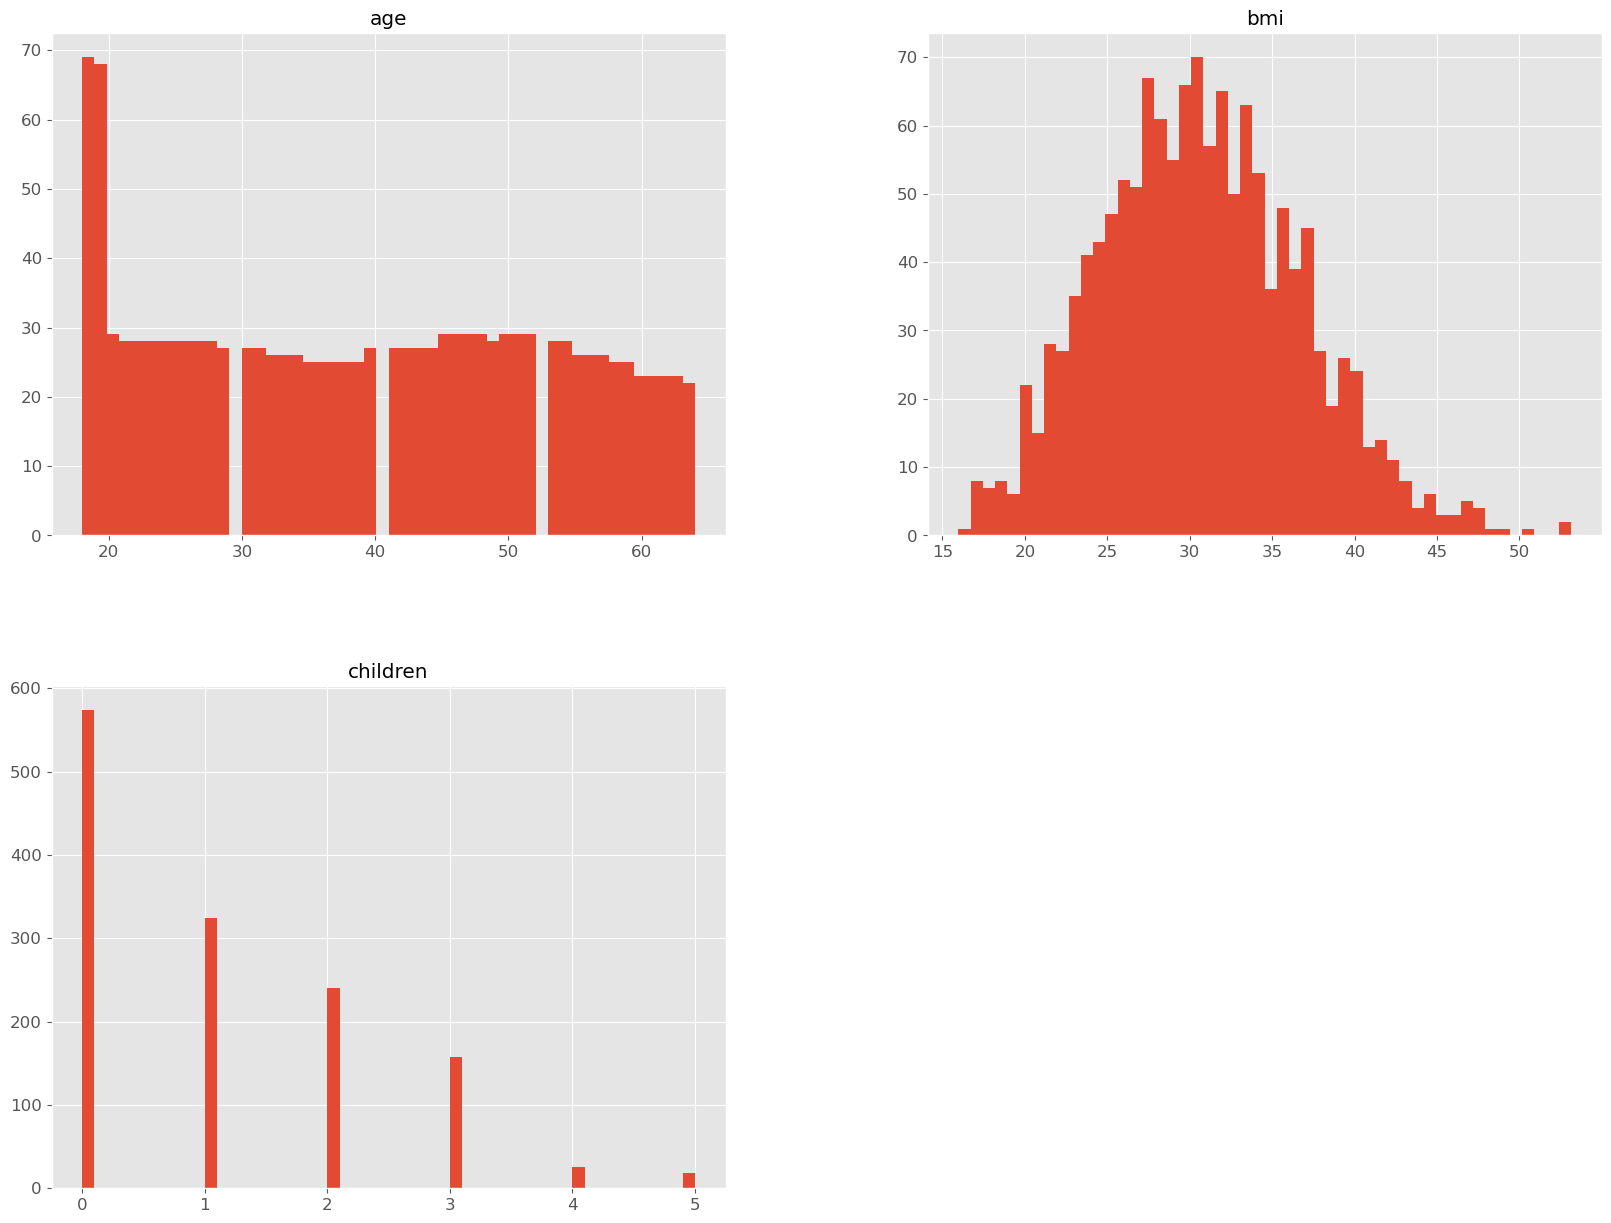

In [913]:
# criar histograma de cada atributo e plotar em uma image de 20x15
# cada histograma terá 50 bins 
X.hist(bins=50, figsize=(20,15))

<Axes: >

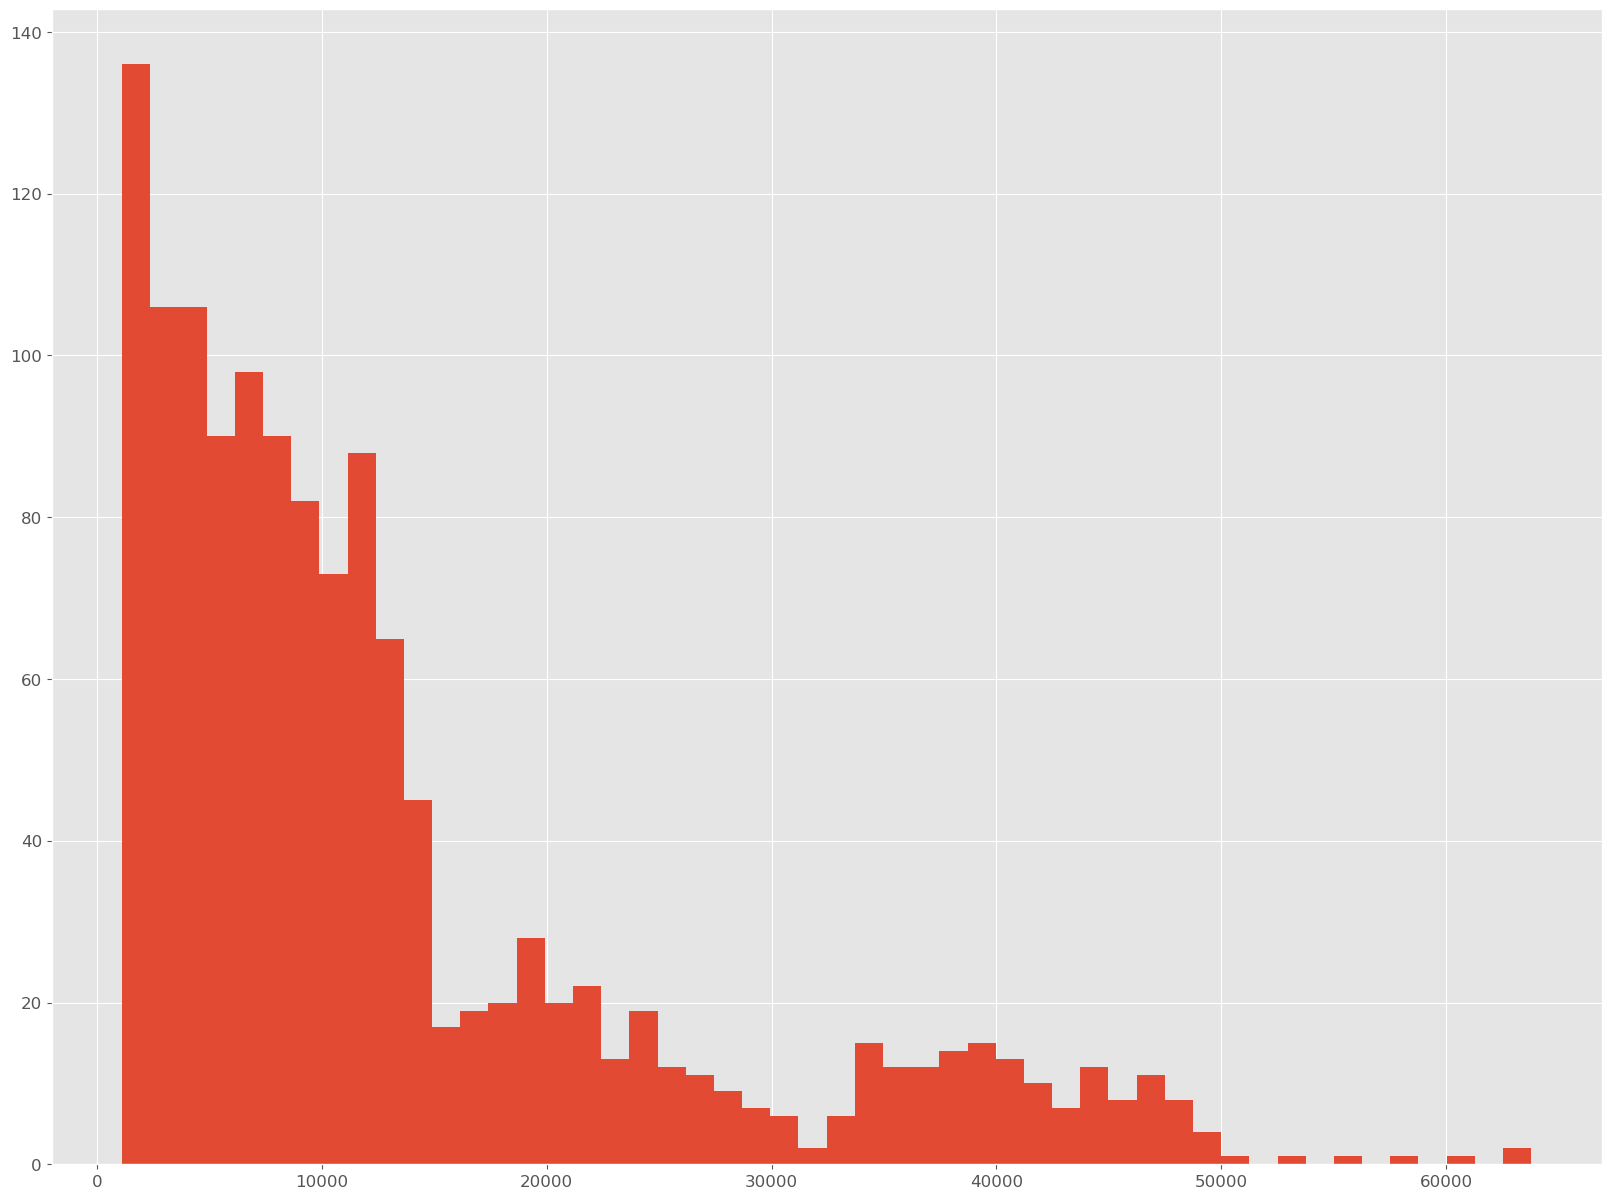

In [914]:
Y.hist(bins=50, figsize=(20,15))

1. A única variável que aparenta esta dispota segundo uma distribuição normal, simétrica é BMI
2. Os valores de Charges não estão distribuídos de forma simétrica
3. Idade possui possui um pico antes dos 20, mas depois disso, a distribuição de valores é relativamente homogênea, como se a pesquisa tenha focado em agrupar o mesmo numero de pessoas por idade e por 
sexo 



In [915]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [916]:
x_train['smoker'] = label_encoder.fit_transform(x_train['smoker'])

x_train

,age,bmi,children,smoker
216,53,26.600,0,0
731,53,21.400,1,0
866,18,37.290,0,0
202,60,24.035,0,0
820,45,33.700,1,0
...,...,...,...,...
715,60,28.900,0,0
905,26,29.355,2,0
1096,51,34.960,2,1
235,40,22.220,2,1


In [917]:
x_test['smoker'] = label_encoder.fit_transform(x_test['smoker'])

x_test

,age,bmi,children,smoker
559,19,35.530,0,0
1087,57,31.540,0,0
1020,51,37.000,0,0
460,49,36.630,3,0
802,21,22.300,1,0
...,...,...,...,...
682,39,35.300,2,1
629,44,38.950,0,1
893,47,38.940,2,1
807,19,36.575,0,0


In [918]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

x_train_num = x_train.drop("smoker", axis=1)
num_attribs = list(x_train_num)
cat_attribs = ["smoker"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #substituindo valores nulos pela mediana
        ('std_scaler', PolynomialFeatures(degree=4, include_bias=False)), # padronizando as escalas dos dados
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #tratando as variáveis numéricas (chamando a pipeline de cima)
        ("cat", OrdinalEncoder(), cat_attribs), # tratando as variáveis categóricas
    ])

x_train_tr = full_pipeline.fit_transform(x_train)
x_test_tr = full_pipeline.fit_transform(x_test)


## Treinando Modelo de Regressão Linear

In [919]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_tr, y_train)

LinearRegression()

### Avaliando Resultado

In [920]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

predictions = lin_reg.predict(x_test_tr)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
print("Erro médio quadrático: ", lin_rmse)

r2 = r2_score(y_test, predictions)
print('r²',r2)



Erro médio quadrático:  5979.783994408872
r² 0.7604658131612411


<Axes: >

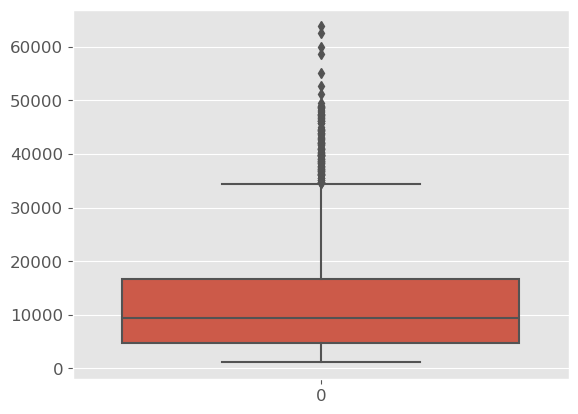

In [921]:
sns.boxplot(data_frame['charges'])

## Treinando Modelo de Arvore de Decisão

In [922]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(x_train_tr, y_train)

DecisionTreeRegressor(max_depth=10)

### Avaliando

In [923]:

predictions = model_dtr.predict(x_test_tr)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
print("Erro médio quadrático: ", lin_rmse)

r2 = r2_score(y_test, predictions)
print('r²',r2)

Erro médio quadrático:  5687.982836393499
r² 0.7832729761099846
